<a href="https://colab.research.google.com/github/pedromazim/visao/blob/main/visao_operacoespontuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as pt

In [2]:
from numba import jit

In [3]:
img1 = io.imread('https://github.com/pedromazim/visao/blob/main/lighthouse.jpg?raw=true')
img2 = io.imread('https://github.com/pedromazim/visao/blob/main/windows.jpg?raw=true')

In [34]:
@jit(nopython=True, looplift=True)
def make_gray(img, weights):

    '''
    converts an colored RGB image to grayscale

    img : image to be converted
    weights : list or array containing the relative weights of red, blue and green for conversion

    '''
    img_recol = np.zeros((img.shape[0],img.shape[1]))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
                img_recol[i,j] = weights[0]*img[i,j,0] + weights[1]*img[i,j,1] + weights[2]*img[i,j,2]

    return img_recol

In [ ]:
img1g = make_gray(img1, [1/3,1/3,1/3])
img2g = make_gray(img2, [1/3,1/3,1/3])

In [ ]:
img3 = 0.7*img1g + 0.3*img2g

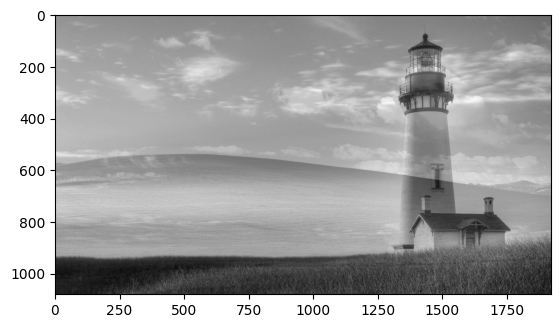

In [ ]:
pt.imshow(img3, cmap='gray')

In [4]:
car1 = io.imread('https://github.com/pedromazim/visao/blob/main/carfig3.gif?raw=true')
car2 = io.imread('https://github.com/pedromazim/visao/blob/main/carfig6.gif?raw=true')

(-0.5, 179.5, 142.5, -0.5)

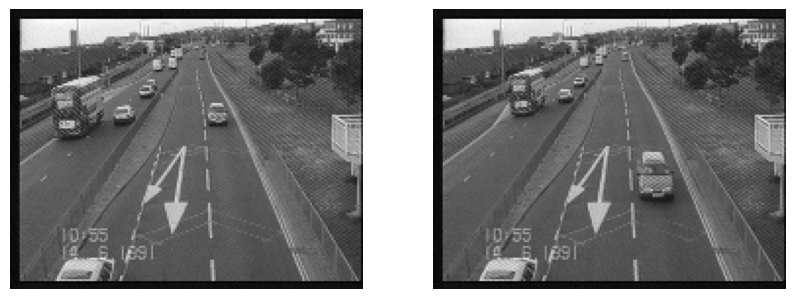

In [6]:
fig, ax = pt.subplots(1,2, figsize=(10,15))
ax[0].imshow(car1, cmap='gray')
ax[1].imshow(car2, cmap='gray')
ax[0].axis('off')
ax[1].axis('off')

In [45]:
def subtraction(img1, img2, threshold):
    img2 = make_gray(img2,[1/3,1/3,1/3])
    img1 = make_gray(img1,[1/3,1/3,1/3])
    subt = np.zeros_like(img1)
    for i in range(img1.shape[0]):
        for j in  range(img1.shape[1]):
            if (img2[i,j]-img1[i,j]) < threshold:
                subt[i,j] = 0
            else:
                subt[i,j] = img2[i,j]-img1[i,j]
    return subt

(-0.5, 179.5, 142.5, -0.5)

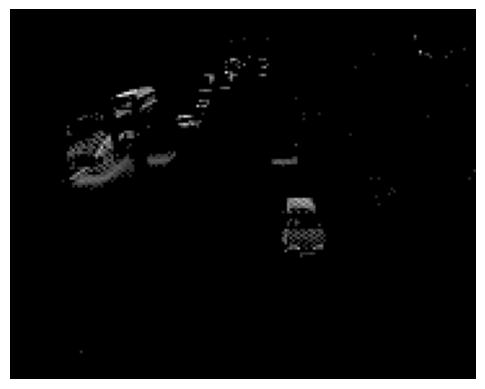

In [46]:
pt.imshow(subtraction(car1,car2, 30), cmap='gray')
pt.axis('off')